In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import * 
from pycaret.regression import *
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from category_encoders.target_encoder import TargetEncoder
pd.set_option("display.max_columns", None)
from sklearn.model_selection import * 
from sklearn.metrics import * 


In [19]:
df = pd.read_csv('Processed_Train_Data',sep='\t')

In [20]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,05-02-2010,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
1,1,2,05-02-2010,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
2,1,3,05-02-2010,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
3,1,4,05-02-2010,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
4,1,5,05-02-2010,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,26-10-2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420281,45,94,26-10-2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420282,45,95,26-10-2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420283,45,97,26-10-2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False


In [21]:
df1 = df.sort_values(by = ['Year','Month','Week'])

In [22]:
df1


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,05-02-2010,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
1,1,2,05-02-2010,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
2,1,3,05-02-2010,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
3,1,4,05-02-2010,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
4,1,5,05-02-2010,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,26-10-2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420281,45,94,26-10-2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420282,45,95,26-10-2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420283,45,97,26-10-2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False


In [23]:
df1 = df1.reset_index(drop=True)

In [24]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,05-02-2010,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
1,1,2,05-02-2010,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
2,1,3,05-02-2010,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
3,1,4,05-02-2010,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
4,1,5,05-02-2010,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,26-10-2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420281,45,94,26-10-2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420282,45,95,26-10-2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420283,45,97,26-10-2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43,False,False,False,False


We have tried diff models and the wmae was about 1650-1900 for
now we will try to incorporate year feature and also find out whether the month and week should be treated as a continous or ordinal

In [25]:
df1['Type'] = df1['Type'].map({'A' : 2 , 'B':1,'C':0})

In [26]:
ll = LabelEncoder()
for i in df1.select_dtypes(exclude='number').columns:
    df1[i] = ll.fit_transform(df1[i])

In [27]:
df1.drop(columns=['Size'],inplace=True)

<AxesSubplot:xlabel='Year'>

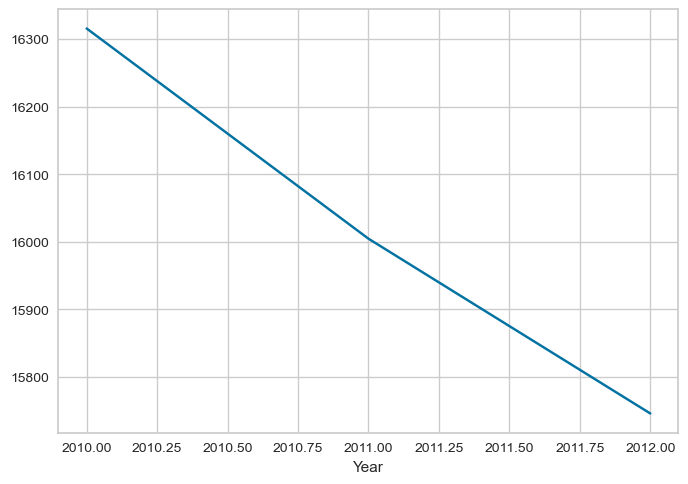

In [28]:
df.groupby('Year')['Weekly_Sales'].mean().plot(kind='line')

<AxesSubplot:xlabel='Year'>

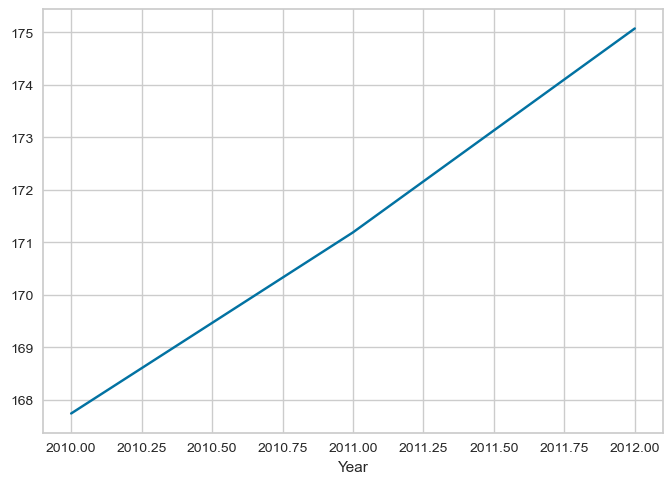

In [29]:
df.groupby('Year')['CPI'].mean().plot(kind='line')

In [16]:
# as  the cpi is increasing over the years we can spot that the sales are decreasing

In [17]:
# the mean sales is now decreasing over the period

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

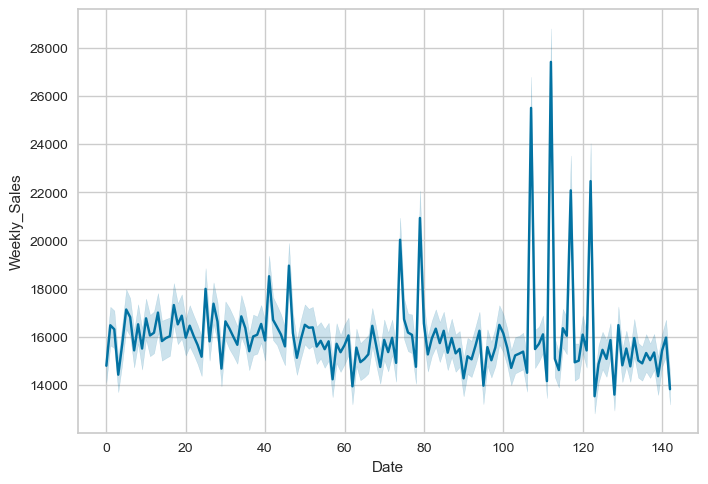

In [30]:
sns.lineplot(df1['Date'],df1['Weekly_Sales'])

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

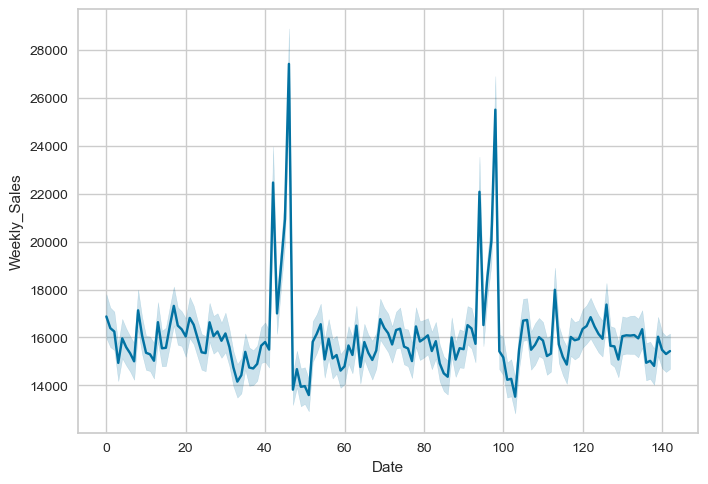

In [19]:
sns.lineplot(df1['Date'],df1['Weekly_Sales'])
# from this plot its evident that week number  has seasonlity.
# and it should be treated in a categorical way as the 
# there is no continoual trend

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

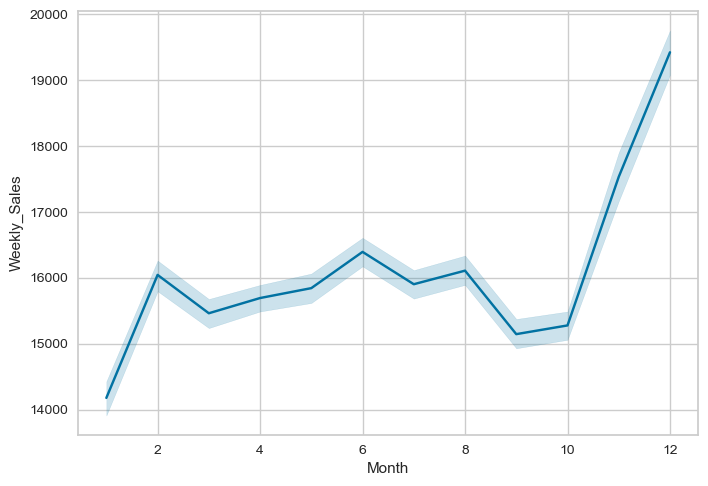

In [20]:
sns.lineplot(df1['Month'],df1['Weekly_Sales'])
# month also should be treated in a ctegorical way

<AxesSubplot:xlabel='Month'>

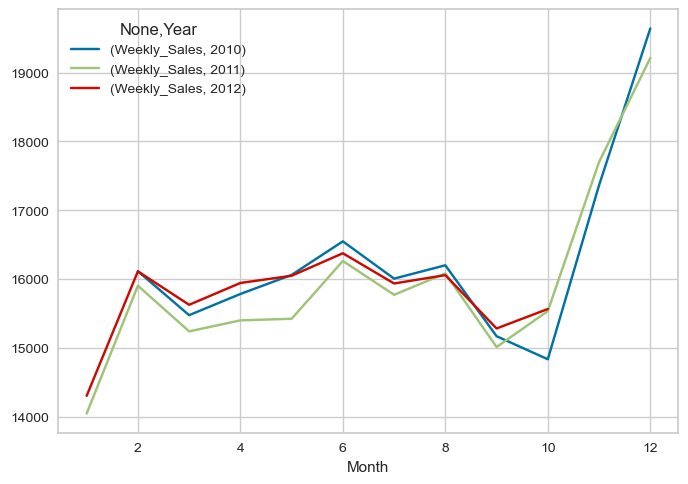

In [21]:
pd.pivot_table(data = df1,index= 'Month',columns ='Year',values = ['Weekly_Sales']).plot()

In [22]:
#upon analysing the year column is not giving any clear pattern
#since we can see that its almost showing a downward trend 
# we will give reverse ordinal encoding to year and try it or we will drop the year column and try

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

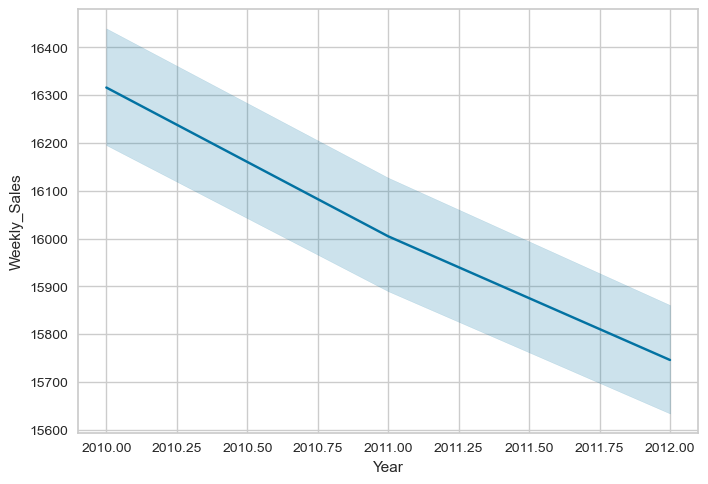

In [23]:
sns.lineplot(df1['Year'],df1['Weekly_Sales'])

In [31]:
df2 = df1.copy()

In [32]:
df2['Year'] = df2['Year'].map({2012:0,2011:1,2010:2})

In [33]:
# instead of directly going for one hot encoding
# we will try creating bins for the month and year 

In [34]:
df1['Weekly_Sales'].skew()
# we will go  by median

3.259108889879835

In [35]:
df2.groupby(['Month'])['Weekly_Sales'].median().sort_values(ascending =False)

Month
12    9278.800
11    8114.580
6     7912.000
8     7850.960
5     7802.025
2     7729.620
4     7670.800
7     7587.910
3     7527.300
10    7375.400
9     7229.800
1     6187.835
Name: Weekly_Sales, dtype: float64

In [36]:
a = df2.groupby(['Month'])['Weekly_Sales'].median().sort_values(ascending =False).index

In [37]:
a

Int64Index([12, 11, 6, 8, 5, 2, 4, 7, 3, 10, 9, 1], dtype='int64', name='Month')

In [38]:
mon_dict = {2:[12,11],1:[6,8,5,2,4,7,3,10,9],0:[1]}


In [39]:
mon_dict

{2: [12, 11], 1: [6, 8, 5, 2, 4, 7, 3, 10, 9], 0: [1]}

In [40]:
def mon (x):
    global mon_dict
    for k,v in mon_dict.items():
        for  i in v:
            if i == x:
                return k

In [41]:
mon_dict.items()

dict_items([(2, [12, 11]), (1, [6, 8, 5, 2, 4, 7, 3, 10, 9]), (0, [1])])

In [42]:
df2['Month'] = df2['Month'].apply(mon)

In [43]:
df2.groupby('Week')['Weekly_Sales'].median().sort_values(ascending =False)

Week
51    13432.220
50    10325.680
47    10052.200
49     9067.810
7      8302.180
22     8151.150
14     8048.545
6      8004.545
23     7997.325
21     7993.000
31     7967.330
48     7891.920
18     7888.740
24     7874.455
33     7857.430
34     7851.455
26     7814.260
11     7794.930
27     7792.260
32     7758.330
25     7751.545
19     7718.305
44     7712.660
13     7695.220
16     7693.545
35     7689.240
20     7668.180
45     7644.640
46     7632.290
9      7577.165
36     7550.420
15     7511.895
40     7500.060
43     7491.155
29     7465.860
28     7451.810
10     7403.000
30     7391.480
12     7381.760
42     7370.820
17     7361.930
5      7358.935
8      7296.390
41     7224.985
52     7124.865
37     7101.990
38     7062.915
39     6947.885
1      6562.280
3      6180.425
4      6030.565
2      6024.760
Name: Weekly_Sales, dtype: float64

In [44]:
# we will make  13 bins 

In [45]:
 w = df2.groupby('Week')['Weekly_Sales'].median().sort_values(ascending =False).index

In [46]:
w = list(w)

In [47]:
week_dict = {12:[],11:[],10:[],9:[],8:[],7:[],6:[],5:[],4:[],3:[],2:[],1:[],0:[]}
for i in (w):

    if w.index(i) < 4:
        week_dict[12].append(i)
    elif w.index(i) >=4 and w.index(i) < 8:
        week_dict[11].append(i)
    elif w.index(i) >=8 and w.index(i) < 12:
        week_dict[10].append(i) 
    elif w.index(i) >=12 and w.index(i) < 16:
        week_dict[9].append(i)
    elif w.index(i) >=16 and w.index(i) < 20:
        week_dict[8].append(i)
    elif w.index(i) >=20 and w.index(i) < 24:
        week_dict[7].append(i)
    elif w.index(i) >=24 and w.index(i) < 28:
        week_dict[6].append(i)
    elif w.index(i) >=28 and w.index(i) < 32:
        week_dict[5].append(i)
    elif w.index(i) >=32 and w.index(i) < 36:
        week_dict[4].append(i)
        
    elif w.index(i) >=36 and w.index(i) < 40:
        week_dict[3].append(i)
    elif w.index(i) >=40 and w.index(i) < 44:
        week_dict[2].append(i)
        
    elif w.index(i) >=44 and w.index(i) < 48:
        week_dict[1].append(i)
        
    elif w.index(i) >=48 and w.index(i) < 52:
        
        week_dict[0].append(i)
    elif w.index(i) >=52 :
        week_dict[11].append(i)
        
    

In [48]:
week_dict

{12: [51, 50, 47, 49],
 11: [7, 22, 14, 6],
 10: [23, 21, 31, 48],
 9: [18, 24, 33, 34],
 8: [26, 11, 27, 32],
 7: [25, 19, 44, 13],
 6: [16, 35, 20, 45],
 5: [46, 9, 36, 15],
 4: [40, 43, 29, 28],
 3: [10, 30, 12, 42],
 2: [17, 5, 8, 41],
 1: [52, 37, 38, 39],
 0: [1, 3, 4, 2]}

In [49]:
def week (x):
    global week_dict
    for k,v in week_dict.items():
        for  i in v:
            if i == x:
                return k

In [50]:
df2['Week'] = df2['Week'].apply(week)

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

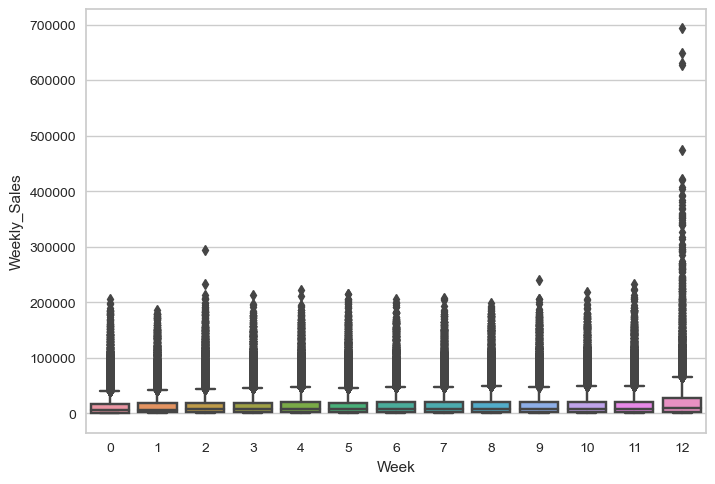

In [44]:
sns.boxplot(df2['Week'],df2['Weekly_Sales'])

In [51]:
df2.groupby('Week')['Weekly_Sales'].median()

Week
0      6187.835
1      7057.960
2      7301.405
3      7386.280
4      7485.180
5      7555.385
6      7679.330
7      7713.440
8      7792.600
9      7872.320
10     7967.330
11     8122.970
12    10475.045
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

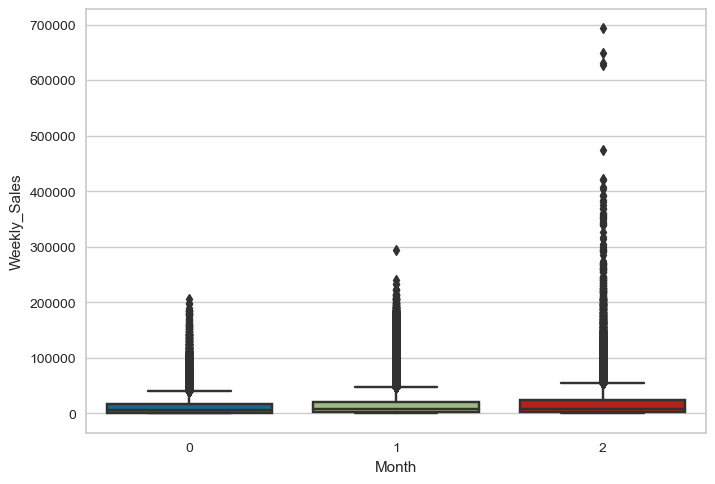

In [52]:
sns.boxplot(df2['Month'],df2['Weekly_Sales'])

In [53]:
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,19,24924.50,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
1,1,2,19,50605.27,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
2,1,3,19,13740.12,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
3,1,4,19,39954.04,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
4,1,5,19,32229.38,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,121,2487.80,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420281,45,94,121,5203.31,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420282,45,95,121,56017.47,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420283,45,97,121,6817.48,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0


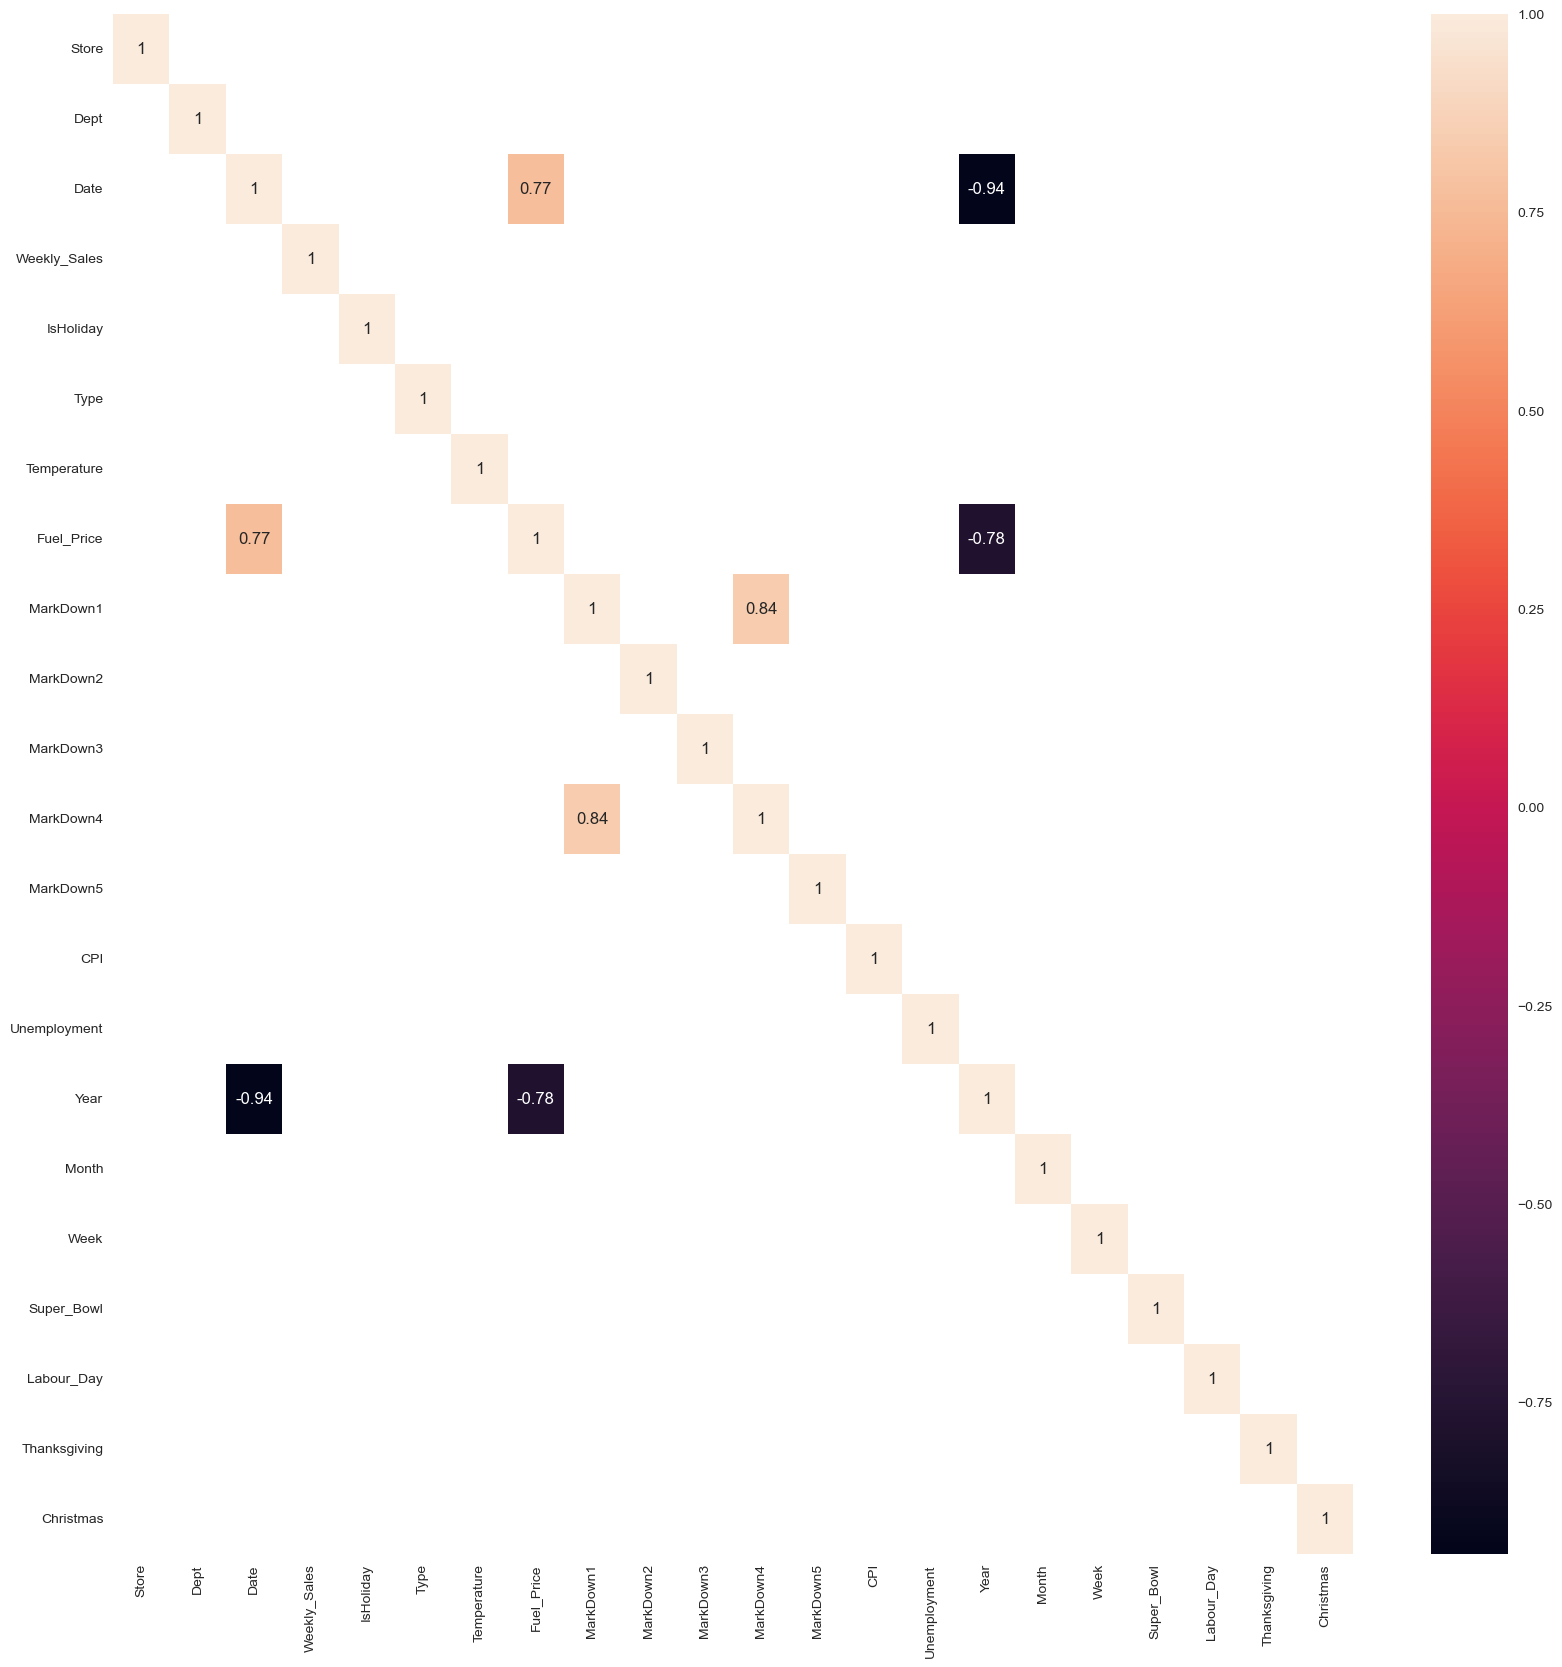

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr()[(df2.corr() < -0.65 ) |(df2.corr() > 0.65 ) ],annot =True)
plt.show()

In [54]:
df2.drop(columns = ['Date'],inplace =True)

In [55]:
# we will go by target encoding for columns store and dept

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Weekly_Sales  420285 non-null  float64
 3   IsHoliday     420285 non-null  int64  
 4   Type          420285 non-null  int64  
 5   Temperature   420285 non-null  float64
 6   Fuel_Price    420285 non-null  float64
 7   MarkDown1     420285 non-null  float64
 8   MarkDown2     420285 non-null  float64
 9   MarkDown3     420285 non-null  float64
 10  MarkDown4     420285 non-null  float64
 11  MarkDown5     420285 non-null  float64
 12  CPI           420285 non-null  float64
 13  Unemployment  420285 non-null  float64
 14  Year          420285 non-null  int64  
 15  Month         420285 non-null  int64  
 16  Week          420285 non-null  int64  
 17  Super_Bowl    420285 non-null  int64  
 18  Labo

In [52]:
setup(df2,target='Weekly_Sales',remove_multicollinearity=True,preprocess=True)

KeyboardInterrupt: 

In [ ]:
compare_models()

In [ ]:
#we are getting high error for this approach

In [66]:
df2['Store'] = df2['Store'].astype(object)
df2['Dept'] = df2['Dept'].astype(object)


In [67]:
tt  =TargetEncoder()


In [70]:
x2

,Store,Dept,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,21742.767306,19213.485088,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
1,21742.767306,43607.020113,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
2,21742.767306,11793.698516,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
3,21742.767306,25974.630238,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
4,21742.767306,21368.950301,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,11692.220986,27012.632248,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420281,11692.220986,33864.675127,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420282,11692.220986,69824.423080,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420283,11692.220986,14262.394977,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0


In [69]:
x2 = df2.copy()
x2 = tt.fit_transform(x2.drop(columns = 'Weekly_Sales'),x2['Weekly_Sales'])

In [75]:
x2

,Store,Dept,Date,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,21742.767306,19213.485088,0,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
1,21742.767306,43607.020113,0,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
2,21742.767306,11793.698516,0,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
3,21742.767306,25974.630238,0,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
4,21742.767306,21368.950301,0,0,2,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,11692.220986,27012.632248,142,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420281,11692.220986,33864.675127,142,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420282,11692.220986,69824.423080,142,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420283,11692.220986,14262.394977,142,0,1,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0


In [76]:
setup(x2,target=df2['Weekly_Sales'],remove_multicollinearity=True)

KeyboardInterrupt: 

In [69]:
models_to_compare = [
    'xgboost',
    'gbr',  # Gradient Boosting Regressor
    'rf',   # Random Forest Regressor
    'lightgbm',
    'lr',   # Linear Regression
    'lasso',
    'ridge',
    'dt',   # Decision Tree Regressor
    'ada',  # AdaBoost Regressor
]

In [70]:
compare_models(include=models_to_compare,fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1791.3446,19775559.9664,4441.7925,0.9618,0.5300,15.0028,66.9880
dt,Decision Tree Regressor,2302.6327,33624977.6937,5796.9375,0.9350,0.5507,16.7007,1.3920
xgboost,Extreme Gradient Boosting,3216.0102,33928951.2000,5821.4159,0.9344,1.1146,46.7289,13.4840
lightgbm,Light Gradient Boosting Machine,3998.3428,46634215.4036,6827.4889,0.9098,1.2736,63.3798,1.4320
gbr,Gradient Boosting Regressor,5203.1629,91687117.9449,9570.6742,0.8227,1.3841,79.4927,19.7580
lr,Linear Regression,8253.9537,175805523.2000,13256.8338,0.6600,1.8253,194.3162,2.1540
lasso,Lasso Regression,8253.3758,175805456.0000,13256.8268,0.6600,1.8254,194.3854,3.0560
ridge,Ridge Regression,8253.9447,175805449.6000,13256.8311,0.6600,1.8254,194.3164,0.3100
ada,AdaBoost Regressor,13541.4459,298599291.4253,17143.2396,0.4219,2.2323,411.5576,9.6200


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=8869)

In [48]:
rf_py = create_model('rf',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1725.0653,19698419.9154,4438.2902,0.9620,0.4750,6.1090
1,1692.6749,19147402.6678,4375.7745,0.9631,0.4859,4.9201
2,1697.8139,17480588.6971,4180.9794,0.9664,0.4946,11.5866
Mean,1705.1847,18775470.4268,4331.6814,0.9638,0.4852,7.5386
Std,14.2134,942848.1751,109.5761,0.0019,0.0080,2.9032


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#now we will try without year column


In [59]:
X  = df2.drop(columns =['Weekly_Sales'])
y = df2['Weekly_Sales']
xtrain  = X[: round(len(X)*0.70)]
xtest  = X [ round(len(X)*0.70):]

ytrain = y[: round(len(X)*0.70)]
ytest = y[ round(len(X)*0.70):]

In [60]:
tt = TargetEncoder()
tt.fit(xtrain,ytrain)

TargetEncoder(cols=[])

In [51]:
tt.transform(xtrain)

,Store,Dept,Date,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,0,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
1,1,2,0,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
2,1,3,0,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
3,1,4,0,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
4,1,5,0,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294195,14,36,100,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294196,14,38,100,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294197,14,40,100,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294198,14,41,100,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0


In [74]:
xtest

,Store,Dept,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
294200,14,44,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294201,14,46,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294202,14,49,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294203,14,50,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294204,14,52,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,0,1,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420281,45,94,0,1,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420282,45,95,0,1,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0
420283,45,97,0,1,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,1,4,0,0,0,0


In [61]:
# self defined function for  metric
def WMAE(ytest,ypred):
    weight =  xtest['IsHoliday'].apply(lambda x : 5 if x else 1)
    error = (np.sum(weight*np.abs(ytest-ypred)))/(np.sum(weight))
    return error

In [62]:
def WMAET(ytrain,ypred_tr):
    weight =  xtrain['IsHoliday'].apply(lambda x : 5 if x else 1)
    error = (np.sum(weight*np.abs(ytrain-ypred_tr)))/(np.sum(weight))
    return error

In [54]:
train = pd.concat([xtrain,ytrain],axis=1)
test = pd.concat([xtest,ytest],axis=1)

NameError: name 'xtrain' is not defined

In [59]:
y_train = predict_model(rf_py,train)['prediction_label']

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,931.4695,7630319.6844,2762.3033,0.9856,0.3344,3.5108


In [60]:
y_test =predict_model(rf_py,test)['prediction_label']

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,799.8343,3687423.2562,1920.2665,0.9925,0.3590,3.0536


In [68]:
rf_py

RandomForestRegressor(n_jobs=-1, random_state=1113)

In [62]:
WMAET(ytrain,y_train)

1054.4087649252724

In [61]:
WMAE(ytest,y_test)


825.3553044360636

In [63]:
## here we are getting  better result with random forrest_regressor and using the year column


In [64]:
# we will do the same withou year and see the difference

In [78]:
x3 = x2.drop(columns = 'Year')

In [79]:
setup(x3,target=df2['Weekly_Sales'],remove_multicollinearity=True)

,Description,Value
0,Session id,2539
1,Target,Weekly_Sales
2,Target type,Regression
3,Original data shape,"(420285, 21)"
4,Transformed data shape,"(420285, 21)"
5,Transformed train set shape,"(294199, 21)"
6,Transformed test set shape,"(126086, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [80]:
models_to_compare = [
    'xgboost',
    'gbr',  # Gradient Boosting Regressor
    'rf',   # Random Forest Regressor
    'lightgbm',
    'lr',   # Linear Regression
    'lasso',
    'ridge',
    'dt',   # Decision Tree Regressor
    'ada',  # AdaBoost Regressor
]

In [81]:
compare_models(include=models_to_compare,fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1732.7537,17363673.1885,4166.5790,0.9666,0.5158,11.2119,42.0720
dt,Decision Tree Regressor,2239.6702,31579388.5725,5618.2005,0.9392,0.5370,10.2474,0.9900
xgboost,Extreme Gradient Boosting,3216.3606,32457726.8000,5695.9638,0.9375,1.1204,41.2370,14.0400
lightgbm,Light Gradient Boosting Machine,4018.6792,46594439.7548,6824.7402,0.9103,1.2762,59.6236,1.5180
gbr,Gradient Boosting Regressor,5216.1716,92776988.8345,9631.2014,0.8215,1.3880,78.5302,17.5580
lr,Linear Regression,8257.3295,178025518.0882,13342.0269,0.6574,1.8250,183.9850,0.5840
lasso,Lasso Regression,8256.7811,178025832.0972,13342.0388,0.6574,1.8252,183.9976,1.4320
ridge,Ridge Regression,8257.3247,178025516.9166,13342.0268,0.6574,1.8250,183.9851,0.7140
ada,AdaBoost Regressor,14865.7268,338684263.2087,18188.9522,0.3471,2.3327,495.8336,10.4420


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=2539)

In [82]:
train1 = train.drop(columns ='Year')
test1 = train.drop(columns ='Year')

In [83]:
rf_py2 = create_model('rf',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1831.5092,20546132.7579,4532.7842,0.9600,0.5260,12.7459
1,1802.2661,18600001.7213,4312.7719,0.9644,0.5311,8.9393
2,1805.5740,18503121.4996,4301.5255,0.9647,0.5487,13.6928
Mean,1813.1164,19216418.6596,4382.3605,0.9630,0.5353,11.7926
Std,13.0756,941081.3397,106.4646,0.0022,0.0097,2.0543


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
y_train = predict_model(rf_py2,train1)['prediction_label']

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,16123.6079,787939522.5972,28070.2605,-0.4914,5.6557,1.8639


In [87]:
y_test = predict_model(rf_py2,test1)['prediction_label']

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,16123.6079,787939522.5972,28070.2605,-0.4914,5.6557,1.8639


In [88]:
WMAET(ytrain,y_train)

16384.701843687093

In [89]:
# our model with year column is givving better result

## the year wise decrease in sales might havebeen detetcted by the model

In [91]:
# we will build the base rf model

In [71]:
tt =TargetEncoder()

In [72]:
X  = df2.drop(columns =['Weekly_Sales'])
y = df2['Weekly_Sales']
xtrain  = X[: round(len(X)*0.70)]
xtest  = X [ round(len(X)*0.70):]

ytrain = y[: round(len(X)*0.70)]
ytest = y[ round(len(X)*0.70):]

In [73]:
tt.fit(xtrain,ytrain)

TargetEncoder(cols=['Store', 'Dept'])

In [74]:
xtrain = tt.transform(xtrain)
xtest = tt.transform(xtest)

In [75]:
from sklearn.preprocessing import PowerTransformer

In [61]:
xtrain

,Store,Dept,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,21536.822006,19587.858595,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
1,21536.822006,43490.061331,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
2,21536.822006,11590.524014,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
3,21536.822006,25840.944767,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
4,21536.822006,23162.326258,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294195,30173.155187,2063.650065,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294196,30173.155187,60547.297718,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294197,30173.155187,44439.056389,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294198,30173.155187,2054.693648,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf = RandomForestRegressor()

In [63]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [64]:
y_pred_tr = rf.predict(xtrain)
y_pred_tt = rf.predict(xtest)

In [65]:
WMAET(ytrain,y_pred_tr)


679.73375264764

In [66]:
WMAE(ytest,y_pred_tt)

2533.320505005037

In [117]:
## we will tune the model to see if there is any improvement 


In [67]:
from sklearn.model_selection import RandomizedSearchCV


In [68]:
rf = RandomForestRegressor()
param_dist = {
    'n_estimators': [50,150,200],
    'max_depth': [10,25,35],
    'min_samples_split': [3,5,6],
    'min_samples_leaf': [2,3,4]
}

rf = RandomForestRegressor()

# Create a RandomizedSearchCV object with 'neg_mean_absolute_error' scoring
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',  # Use 'neg_mean_absolute_error' as the scoring metric
    cv=3,
    n_jobs=-1,
    random_state=42
)


In [69]:
random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 25, 35],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [3, 5, 6],
                                        'n_estimators': [50, 150, 200]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [73]:
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 25}

In [70]:
rf = RandomForestRegressor(**random_search.best_params_)
rf.fit(xtrain,ytrain)
y_pred_tr = rf.predict(xtrain)
y_pred_tt = rf.predict(xtest)


In [71]:
WMAET(ytrain,y_pred_tr)


992.4727872058385

In [72]:
WMAE(ytest,y_pred_tt)

2498.3143496020843

In [ ]:
rf = RandomForestRegressor()
param_dist = {
    'n_estimators': [100,150,],
    'max_depth': [10,25,35],
    'min_samples_split': [3,5,6],
    'min_samples_leaf': [2,3,4]
}

rf = RandomForestRegressor()

# Create a RandomizedSearchCV object with 'neg_mean_absolute_error' scoring
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',  # Use 'neg_mean_absolute_error' as the scoring metric
    cv=3,
    n_jobs=-1,
    random_state=42
)


In [61]:
pt = PowerTransformer()
pt.fit(xtrain)

PowerTransformer()

In [62]:
xtrain_new =  pt.transform(xtrain)
xtest_new = pt.transform(xtest)

In [66]:
rf.fit(xtrain_new,ytrain)

RandomForestRegressor()

In [68]:
y_pred_tr = rf.predict(xtrain_new)
y_pred_tt = rf.predict(xtest_new)

In [69]:
WMAET(ytrain,y_pred_tr)


676.6194622046171

In [70]:
WMAE(ytest,y_pred_tt)

2904.684506652923

In [79]:
pd.DataFrame(xtrain_new,columns =xtrain.columns).skew()

Store          -0.203533
Dept           -0.163090
IsHoliday       3.089842
Type           -0.341298
Temperature    -0.129979
Fuel_Price      0.055436
MarkDown1       3.014765
MarkDown2       3.399603
MarkDown3       2.020198
MarkDown4       3.241392
MarkDown5       2.987515
CPI             0.021496
Unemployment   -0.056828
Year           -0.038984
Month           0.090136
Week           -0.201220
Super_Bowl      6.859657
Labour_Day      6.862138
Thanksgiving    6.819072
Christmas       6.841126
dtype: float64

In [107]:
#power transformation not giving good result

In [73]:
rf = RandomForestRegressor()
param_dist = {
    'n_estimators': [125,175],
    'max_depth': [15,25,20],
    'min_samples_split': [5,10],
    'min_samples_leaf': [2]
}

rf = RandomForestRegressor()

grd_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,
    
    scoring='neg_mean_absolute_error',  # Use 'neg_mean_absolute_error' as the scoring metric
    cv=3,
    n_jobs=-1,
)

In [ ]:
{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 25}

In [75]:
grd_search.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 25, 20], 'min_samples_leaf': [2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [125, 175]},
             scoring='neg_mean_absolute_error')

In [77]:
grd_search.best_params_

{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 175}

In [78]:
rf = RandomForestRegressor(**grd_search.best_params_)

In [79]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=175)

In [80]:
WMAET(ytrain,rf.predict(xtrain))

990.6675206844575

In [81]:
WMAE(ytest,rf.predict(xtest))

2494.2535044669185

In [84]:
rf = RandomForestRegressor(max_depth= 30,
 min_samples_leaf= 5,
 min_samples_split= 15,
 n_estimators= 185)

In [85]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=15,
                      n_estimators=185)

In [86]:
WMAET(ytrain,rf.predict(xtrain))

1565.9093691830328

In [87]:
WMAE(ytest,rf.predict(xtest))

2485.711997779368

In [88]:
rf = RandomForestRegressor(max_depth= 35,
 min_samples_leaf= 10,
 min_samples_split= 20,
 n_estimators= 185)

In [90]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=35, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=185)

In [91]:
WMAET(ytrain,rf.predict(xtrain))

1855.8382558811054

In [92]:
WMAE(ytest,rf.predict(xtest))

2571.939993740986

KeyboardInterrupt: 

In [97]:
rf = RandomForestRegressor(max_depth= 40,
 min_samples_leaf= 10,
 min_samples_split= 25,
 n_estimators= 200)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=40, min_samples_leaf=10, min_samples_split=25,
                      n_estimators=200)

In [98]:
WMAET(ytrain,rf.predict(xtrain))

1908.675717833739

In [99]:
WMAE(ytest,rf.predict(xtest))

2574.749847357118

In [100]:
rf = RandomForestRegressor(max_depth= 45,
 min_samples_leaf= 15,
 min_samples_split= 30,
 n_estimators= 200)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=45, min_samples_leaf=15, min_samples_split=30,
                      n_estimators=200)

In [101]:
WMAET(ytrain,rf.predict(xtrain))

2095.4756760013693

In [102]:
WMAE(ytest,rf.predict(xtest))

2629.7858884732077

In [80]:
# we will take the parameters that we obtained for the error 2095 and 2629

### Final Model

**params of final model** 

In [106]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 45,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
rf = RandomForestRegressor(max_depth= 45,
 min_samples_leaf= 15,
 min_samples_split= 30,
 n_estimators= 200)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=45, min_samples_leaf=15, min_samples_split=30,
                      n_estimators=200)

In [81]:
WMAET(ytrain,rf.predict(xtrain))

2097.0626739692048

In [82]:
WMAE(ytest,rf.predict(xtest))

2637.178138734019

In [83]:
rf.score(xtest,ytest)

0.9456859312253248

In [84]:
rf.score(xtrain,ytrain)

0.9548918780662875

In [112]:
from sklearn.feature_selection import SelectFromModel

In [119]:
score = pd.DataFrame(columns =['threshold','train','test'])
score

,threshold,train,test


In [120]:

for i in [0.001,0.0015,0.0020,0.0025,0.00725,0.017,0.020,0.025]:

    sm =SelectFromModel(rf,threshold=i)
    sm.fit(xtrain,ytrain)
    a = list(sm.get_feature_names_out())
    xtr = xtrain[a]
    xtt = xtest[a]
    rf1.fit(xtr,ytrain)
    ytr = rf1.predict(xtr)
    ytt = rf1.predict(xtt)
    score = score.append({'threshold':i,'train':WMAET(ytrain,ytr),'test':WMAE(ytest,ytt)},ignore_index=True)
    print(score)


In [121]:
score

,threshold,train,test
0,0.00100,2129.454019,2680.664266
1,0.00150,2131.757499,2677.905028
2,0.00200,2130.051123,2678.548855
3,0.00250,2141.378935,2685.715340
4,0.00725,2157.779129,2693.723596
5,0.01700,2599.566752,2406.312653
6,0.02000,3154.239463,2722.361372
7,0.02500,3154.210691,2722.617747


### Feature_importance and Final Feature Selection

In [126]:
rf_imp = pd.DataFrame({'features':xtrain.columns,'score':rf.feature_importances_})


In [130]:
rf_imp.sort_values(by ='score',ascending=False,inplace=True)

In [131]:
rf_imp

,features,score
1,Dept,0.652584
0,Store,0.255335
3,Type,0.028292
15,Week,0.018789
11,CPI,0.015350
12,Unemployment,0.012838
4,Temperature,0.007842
18,Thanksgiving,0.003297
5,Fuel_Price,0.002262
14,Month,0.000896


In [136]:
rf_imp[rf_imp['score'] > 0.00725]

,features,score
1,Dept,0.652584
0,Store,0.255335
3,Type,0.028292
15,Week,0.018789
11,CPI,0.015350
12,Unemployment,0.012838
4,Temperature,0.007842


##### we have obtained the best results at the threshold of the 0.00725

### Feature_importance by Final model

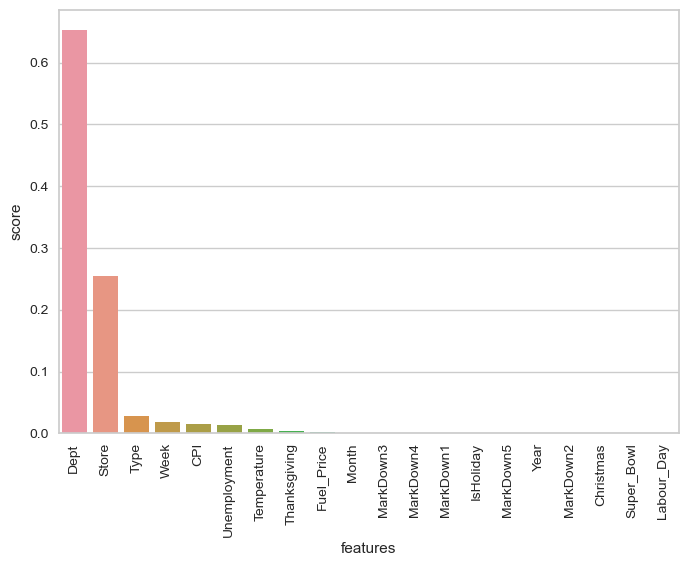

In [142]:
rf_imp
sns.barplot(rf_imp['features'],rf_imp['score'])
plt.xticks(rotation =90)
plt.show()

In [143]:
### at 0.00725 threshold of feature importances

In [85]:
test_r2 = rf.score(xtest,ytest)
train_r2 = rf.score(xtrain,ytrain)

In [86]:
score = pd.DataFrame(columns = ['Model_name','R2_Train','R2_Test','WMAE_Train','WMAE_Test'])
def update(model_name,ytrain,ypred_tr,ytest,ypred):
    global score
    score = score.append({'Model_name' :model_name,'R2_Train':r2_score(ytrain,ypred_tr),'R2_Test':r2_score(ytest,ypred),'WMAE_Train': WMAET(ytrain,ypred_tr),'WMAE_Test' : WMAE(ytest,ypred)},ignore_index =True)


In [87]:
score

,Model_name,R2_Train,R2_Test,WMAE_Train,WMAE_Test


In [88]:
update('rf_full',ytrain,rf.predict(xtrain),ytest,rf.predict(xtest))

RandomForestRegressor(max_depth=45, min_samples_leaf=15, min_samples_split=30,
                      n_estimators=200)

In [165]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 45,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [89]:
score

,Model_name,R2_Train,R2_Test,WMAE_Train,WMAE_Test
0,rf_full,0.954892,0.945686,2097.062674,2637.178139


# Now we have built a generalized model for all the department and store
# model came out of overfit condition via Hyperparmeter tuning

In [91]:
ytest_tt = rf.predict(xtest)
ytest_tr = rf.predict(xtrain)

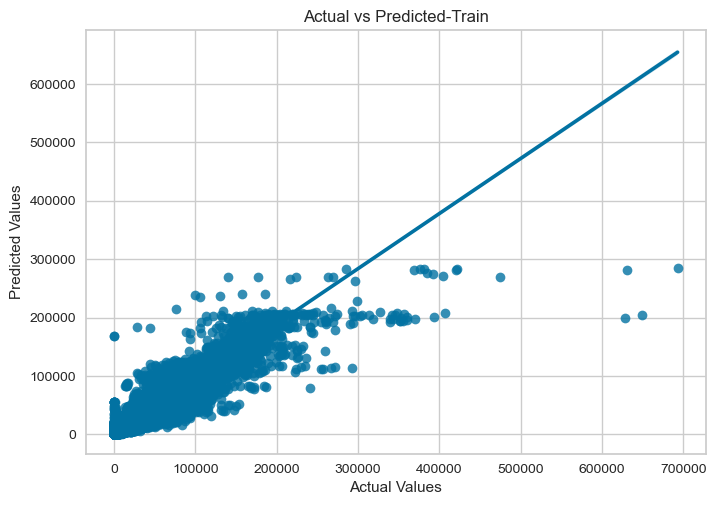

In [105]:
sns.regplot(ytrain,ytest_tr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted-Train')
plt.show()

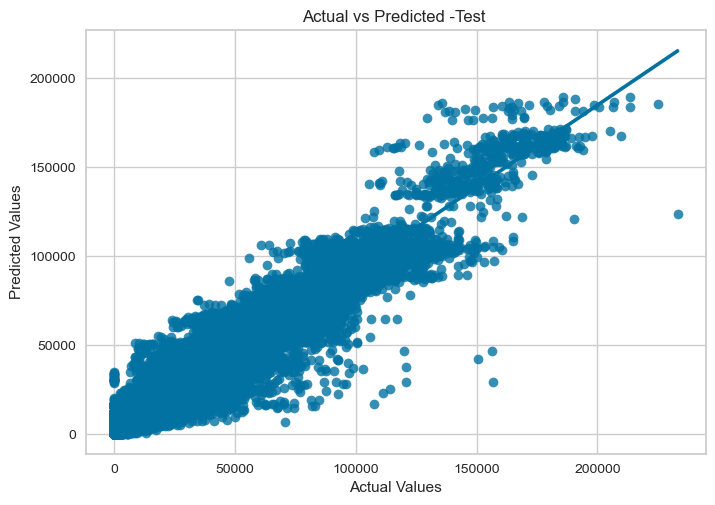

In [106]:
sns.regplot(ytest,ytest_tt)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted -Test ')
plt.show()

In [108]:
xtrain

,Store,Dept,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,21536.822006,19587.858595,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
1,21536.822006,43490.061331,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
2,21536.822006,11590.524014,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
3,21536.822006,25840.944767,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
4,21536.822006,23162.326258,0,2,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294195,30173.155187,2063.650065,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294196,30173.155187,60547.297718,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294197,30173.155187,44439.056389,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0
294198,30173.155187,2054.693648,0,2,35.88,3.422,10428.95,39234.09,839.74,981.17,15911.56,189.194056,8.424,0,0,0,0,0,0,0


    xtra